In [ ]:
# Titanic Assignment Solution (Single Cell - PDF Version)

# Step 1: Import librarie

import pandas as pd
import tabula
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2: Load dataset from PDF
pdf_file = "/content/Titanic-Dataset.pdf"

# Extract all tables from PDF (assuming only one main table)
tables = tabula.read_pdf(pdf_file, pages="all", multiple_tables=True)

# If multiple tables found, take the first one
df = tables[0]

print("Dataset loaded. Shape:", df.shape)

# Step 3: Initial inspection
print("\n=== First 10 rows ===")
print(df.head(10))

print("\n=== Info ===")
df.info()

print("\n=== Describe ===")
print(df.describe(include="all"))

print("\n=== Missing values (before cleaning) ===")
print(df.isnull().sum())

# Step 4: Cleaning missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:   # Drop Cabin if exists
    df.drop(columns=['Cabin'], inplace=True)

# Step 5: Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

# Encode Sex
if 'Sex' in df.columns:
    df['SexEncoded'] = df['Sex'].map({'male': 1, 'female': 0})

# Encode Embarked (dummy variables)
if 'Embarked' in df.columns:
    emb_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
    df = pd.concat([df, emb_dummies], axis=1)

# Step 6: Drop unnecessary columns
cols_to_drop = ['Name', 'Ticket', 'Sex', 'Embarked']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

print("\n=== Columns after dropping ===")
print(df.columns.tolist())

# Step 7: Survival analysis
if 'Survived' in df.columns:
    print("\n=== Survival rate by Pclass ===")
    survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
    print(survival_by_pclass)

    print("\n=== Average Age by Pclass ===")
    print(df.groupby('Pclass')['Age'].mean())

    # Step 8: Visualization
    # Bar plot
    plt.figure(figsize=(6,4))
    survival_by_pclass.plot(kind='bar')
    plt.title("Survival Rate by Pclass")
    plt.xlabel("Pclass")
    plt.ylabel("Survival Rate")
    plt.ylim(0,1)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle=':', alpha=0.6)
    plt.show()

    # Scatter plot
    plt.figure(figsize=(8,6))
    sc = plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='viridis', alpha=0.7)
    plt.xlabel("Age")
    plt.ylabel("Fare")
    plt.title("Age vs Fare (colored by Survived)")
    cbar = plt.colorbar(sc, ticks=[0,1])
    cbar.ax.set_yticklabels(['Not Survived (0)', 'Survived (1)'])
    plt.show()

# Step 9: Save final dataset
output_file = "titanic_preprocessed.csv"
df.to_csv(output_file, index=False)
print("\nPreprocessed dataset saved as:", output_file)


ModuleNotFoundError: No module named 'tabula'

First 10 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timoth

/tmp/ipython-input-2562667090.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-2562667090.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

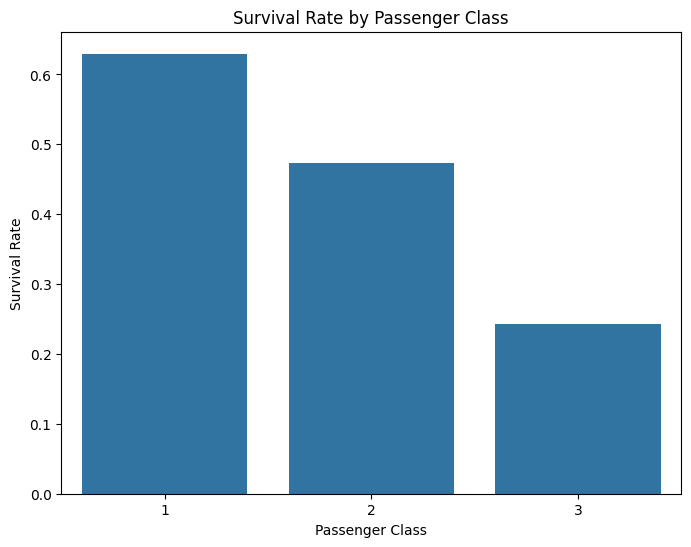

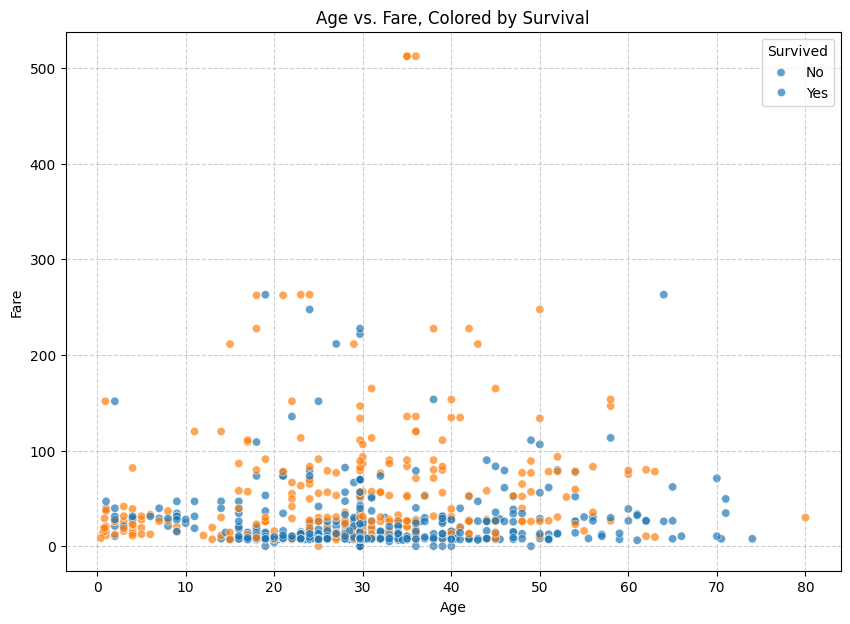


Final DataFrame after dropping columns (first 5 rows):
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  FamilySize  \
0            1         0       3  22.0      1      0   7.2500           1   
1            2         1       1  38.0      1      0  71.2833           1   
2            3         1       3  26.0      0      0   7.9250           0   
3            4         1       1  35.0      1      0  53.1000           1   
4            5         0       3  35.0      0      0   8.0500           0   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

print("First 10 rows:")
print(df.head(10))

print("\nData Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())

# Fill 'Age' with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill 'Embarked' with the most frequent port (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)

# Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

# Data Visualization

# Survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Scatter plot of 'Age' vs. 'Fare', colored by 'Survived'
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.7)
plt.title('Age vs. Fare, Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Final Preparation
df.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)

print("\nFinal DataFrame after dropping columns (first 5 rows):")
print(df.head())